In [8]:
# !unzip /content/drive/MyDrive/Colab\ Notebooks/Projects/TensorFlow/Todo/CNN/Face-Mask-12K-Images-Dataset/data.zip

In [9]:
!nvidia-smi

Mon Mar 29 12:54:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [10]:
import tensorflow as tf

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.25,height_shift_range=0.25,shear_range=0.25,zoom_range=0.25,horizontal_flip=True,vertical_flip=True,validation_split=0.25)
test_datagen = ImageDataGenerator(rescale=1/255.0)
valid_datagen = ImageDataGenerator(rescale=1/255.0)

In [13]:
train_data = train_datagen.flow_from_directory(class_mode='binary',directory='/content/data/Train',target_size=(224,224),subset='validation')
test_data = test_datagen.flow_from_directory(class_mode='binary',directory='/content/data/Test',target_size=(224,224))
valid_data = test_datagen.flow_from_directory(class_mode='binary',directory='/content/data/Validation',target_size=(224,224))

Found 2500 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [14]:

# models_to_try = [
#     # # ['efficentnetb2','https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1'],
#     # # ['efficentnetb7','https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1'],
#     # # ['efficentnetb5','https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1'],
#     # # ['efficentnetb0','https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'],
#     # # ['efficentnetb4','https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1'],
#     # # ['efficentnetb3','https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1'],
#     # # ['efficentnetb1','https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1'],
#     # # ['efficentnetb6','https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1'],
#     # # ['resnet50','https://tfhub.dev/tensorflow/resnet_50/feature_vector/1'],
#     # # ['resnet_v2_152','https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4'],
#     # # ['resnet_v1_152','https://tfhub.dev/google/imagenet/resnet_v1_152/feature_vector/4'],
#     # # ['resnet_v1_50','https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/4'],
#     # # ['resnet_v1_101','https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/4'],
#     # # ['amiebanet_a_n18_f448','https://tfhub.dev/google/imagenet/amoebanet_a_n18_f448/feature_vector/1'],
#     # # ['inception_resnet_v2','https://tfhub.dev/google/imagenet/inception_resnet_v2/feature_vector/4'],
#     # # ['inception_v1','https://tfhub.dev/google/imagenet/inception_v1/feature_vector/4'],
#     # # ['inception_v3','https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4'],
#     # # ['nasnet_large','https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4'],
#     # # ['nasnet_mobile','https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4'],
#     # # ['mobilenet_v2','https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'],
#     # # ['mobilenet_v3_large_100_224','https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5'],
#     # # ['mobilenet_v2_100_224','https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4'],
#     # # ['mobilenet_v2_140_224','https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4'],
#     # # ['mobilenet_v1_100_224','https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/feature_vector/4'],
#     # # ['mobilenet_v3_small_100_224','https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5'],
#     # # ['pnasnet_large','https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4'],
#     # # ['cond-biggan','https://tfhub.dev/vtab/cond-biggan/1'],
#     # # ['uncond-biggan','https://tfhub.dev/vtab/uncond-biggan/1']
#     # ['bit/m-r50x3','https://tfhub.dev/google/bit/m-r50x3/1'],
#     ['bit/s-r50x3','https://tfhub.dev/google/bit/s-r50x3/1'],
#     ['bit/m-r101x1','https://tfhub.dev/google/bit/m-r101x1/1'],
#     ['pnasnet_large','https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4'],
#     ['bit/m-r101x3','https://tfhub.dev/google/bit/m-r101x3/1'],
#     ['bit/s-r101x3','https://tfhub.dev/google/bit/s-r101x3/1'],
#     ['bit/s-r152x4','https://tfhub.dev/google/bit/s-r152x4/1'],
#     ['bit/s-r101x1','https://tfhub.dev/google/bit/s-r101x1/1'],
# ]

In [15]:
!pip3 install wandb
import wandb
from wandb.keras import *

     |████████████████████████████████| 2.0MB 9.0MB/s 
     |████████████████████████████████| 163kB 42.0MB/s 
     |████████████████████████████████| 102kB 13.3MB/s 
     |████████████████████████████████| 133kB 49.9MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=e0efa304d380d1777ee2b43dad626d1daf211c5833271043549ff19e2d4558af
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=c22acc0a177ab202c7012d4dade0dbc5a560a9b45ff2aad9c78e88d9bff2a42d
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


In [16]:


import tensorflow_hub as hub

In [17]:
len(test_data)

31

In [18]:
len(train_data)

79

In [19]:
len(valid_data)

25

In [20]:
# for model_to_try in models_to_try:
#   try:
#     print('-'*100)
#     print(model_to_try)
#     print('-'*100)
#     wandb.init(project="Mask-or-Without-Mask",name=f"{model_to_try[0]}-0")
#     model = tf.keras.Sequential([
#       hub.KerasLayer(model_to_try[1],input_shape=(224,224,3)),
#       tf.keras.layers.Dense(1,activation='sigmoid')
#     ])
#     model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
#     model.fit(train_data,validation_data=(test_data),epochs=5,callbacks=[WandbCallback()])
#   except:
#     print('*-*'*100)
#     print(model_to_try)
#     print('*-*'*100)
#     print('It didnt work')

### Results
#### `val_loss` best = ...
#### `val_accuracy` best = ...
#### `accuracy` best = ...
#### `loss` best = ...

In [21]:
train_datagen = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.25,height_shift_range=0.25,shear_range=0.25,zoom_range=0.25,horizontal_flip=True,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.0)
valid_datagen = ImageDataGenerator(rescale=1/255.0)
train_data = train_datagen.flow_from_directory(class_mode='binary',directory='/content/data/Train',target_size=(224,224))
test_data = test_datagen.flow_from_directory(class_mode='binary',directory='/content/data/Test',target_size=(224,224))
valid_data = test_datagen.flow_from_directory(class_mode='binary',directory='/content/data/Validation',target_size=(224,224))

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [23]:
wandb.init(project="Mask-or-Without-Mask",name=f"big-dog")
model = tf.keras.Sequential([
  hub.KerasLayer('https://tfhub.dev/tensorflow/resnet_50/feature_vector/1',input_shape=(224,224,3)),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
model.fit(train_data,validation_data=(test_data),epochs=1000,callbacks=[WandbCallback(),tf.keras.callbacks.EarlyStopping(patience=5)])
model.save('/content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/CNN/Face-Mask-12K-Images-Dataset/model.h5')

Epoch 1/1000
313/313 [==============================] - 125s 384ms/step - loss: 0.1104 - accuracy: 0.9606 - val_loss: 0.0107 - val_accuracy: 0.9970
Epoch 2/1000
313/313 [==============================] - 120s 383ms/step - loss: 0.0247 - accuracy: 0.9935 - val_loss: 0.0054 - val_accuracy: 0.9980
Epoch 3/1000
313/313 [==============================] - 120s 383ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0058 - val_accuracy: 0.9980
Epoch 4/1000
313/313 [==============================] - 119s 379ms/step - loss: 0.0159 - accuracy: 0.9946 - val_loss: 0.0037 - val_accuracy: 0.9980
Epoch 5/1000
313/313 [==============================] - 120s 382ms/step - loss: 0.0127 - accuracy: 0.9959 - val_loss: 0.0035 - val_accuracy: 0.9980
Epoch 6/1000
313/313 [==============================] - 120s 383ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0040 - val_accuracy: 0.9990
Epoch 7/1000
313/313 [==============================] - 119s 381ms/step - loss: 0.0077 - accuracy: 0.9980 - val_

In [24]:
!nvidia-smi

Mon Mar 29 13:26:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    37W /  70W |   9030MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [27]:
import os

In [40]:
class_names = ['WithoutMask','WithMask']

In [41]:
test_imgs = os.listdir('/content/test')

In [42]:
test_imgs

['WhatsApp Image 2021-03-22 at 10.40.55.jpeg',
 'WhatsApp Image 2021-03-22 at 10.40.56.jpeg',
 '.ipynb_checkpoints',
 'WhatsApp Image 2021-03-22 at 10.40.51.jpeg',
 'WhatsApp Image 2021-03-22 at 10.40.52.jpeg',
 'WhatsApp Image 2021-03-22 at 10.40.54.jpeg',
 'WhatsApp Image 2021-03-22 at 10.40.57.jpeg',
 'WhatsApp Image 2021-03-22 at 10.40.58.jpeg']

In [43]:
test_imgs.remove('.ipynb_checkpoints')

In [44]:
test_imgs

['WhatsApp Image 2021-03-22 at 10.40.55.jpeg',
 'WhatsApp Image 2021-03-22 at 10.40.56.jpeg',
 'WhatsApp Image 2021-03-22 at 10.40.51.jpeg',
 'WhatsApp Image 2021-03-22 at 10.40.52.jpeg',
 'WhatsApp Image 2021-03-22 at 10.40.54.jpeg',
 'WhatsApp Image 2021-03-22 at 10.40.57.jpeg',
 'WhatsApp Image 2021-03-22 at 10.40.58.jpeg']

In [45]:
import matplotlib.pyplot as plt

[[0.89999896]]


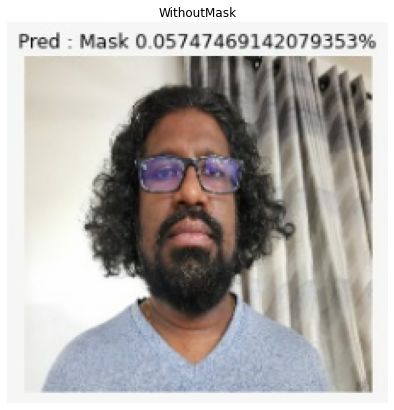

[[8.018338e-06]]


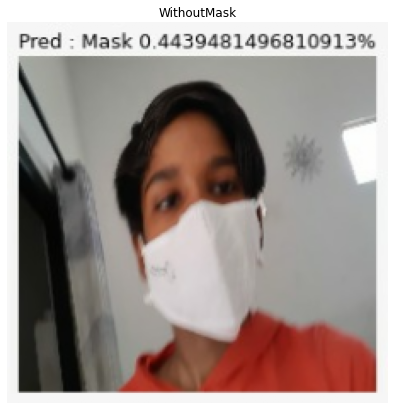

[[0.00584151]]


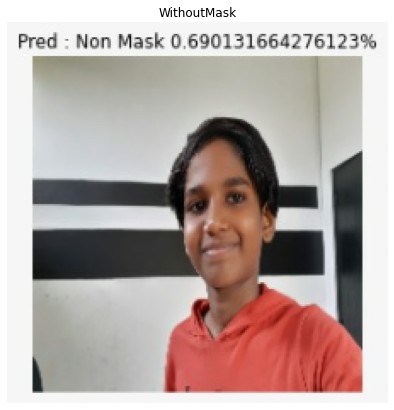

[[0.00300848]]


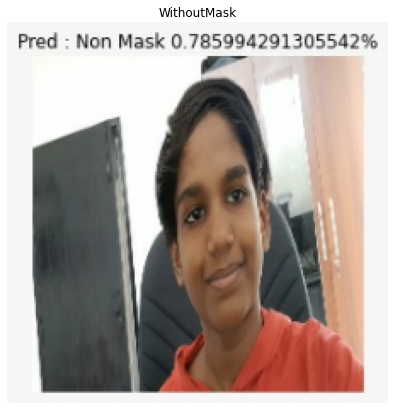

[[0.01107974]]


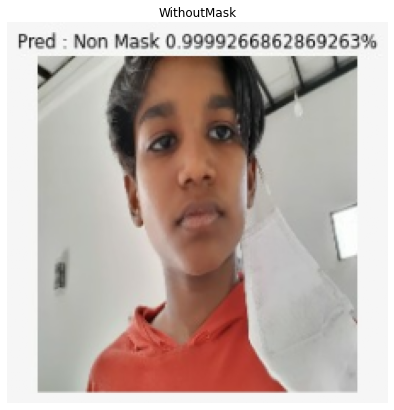

[[5.2896194e-08]]


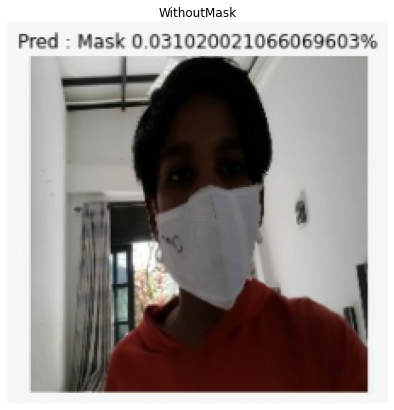

[[0.31458965]]


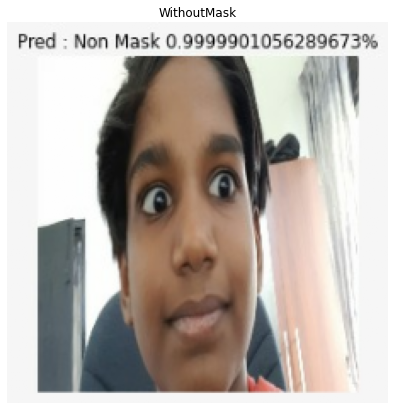

In [46]:
for test_img in test_imgs:
  img = tf.io.read_file(f'/content/test/{test_img}')
  img = tf.io.decode_jpeg(img)
  img = tf.image.resize(images=img,size=(224,224))
  img = img / 255.0
  preds = model.predict(tf.expand_dims(img,axis=0))
  print(preds)
  plt.figure(figsize=(10,7))
  plt.imshow(img)
  plt.title(f'{class_names[preds.argmax()]}')
  plt.axis(False)
  plt.show();